In [249]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

In [250]:
design_matrix = pd.read_csv(
    #"../tests/input_files/design_sepsis.tsv",
    "/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [251]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)
design_matrix

,sample,WHO grade,group
0,20200520_TOF1_AF_002_ZeBanC_P1_A1,7,2
1,20200520_TOF1_AF_545_ZeBanC_P4_H9,6,2
2,20200520_TOF1_AF_567_ZeBanC_P6_B9,6,2
3,20200710_TOF1_LS_239_ZeBanc2_P1_C12,7,2
4,20200710_TOF1_LS_240_ZeBanc2_P3_H1,7,2
...,...,...,...
682,20200520_TOF1_AF_468_ZeBanC_P4_C6,4,1
683,20200520_TOF1_AF_460_ZeBanC_P4_B12,4,1
684,20200520_TOF1_AF_454_ZeBanC_P4_B7,3,1
685,20200520_TOF1_AF_452_ZeBanC_P4_B6,3,1


In [252]:
design_matrix['group'].value_counts()

group
2    406
1    281
Name: count, dtype: int64

In [253]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
).impute(method="neighborhood")

In [254]:
qm = qm.compare(
    method="linregress",
    min_samples_per_group=10,
    comparisons=[(2, 1)]
)

In [255]:
X, y = qm.to_ml()

In [256]:
X = X.T.copy()
X

,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,20200520_TOF1_AF_551_ZeBanC_P6_A2,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
P00747,6.369558,6.273480,6.986697,6.515837,5.695563,6.356513,7.004830,6.356030,5.910256,6.413893,...,6.468140,6.453261,6.571446,6.681331,6.671234,6.622158,6.412603,6.805669,6.783759,6.550999
P02787,8.401196,8.880733,8.507033,8.520859,7.735718,8.295316,7.937633,8.426938,8.223306,8.711774,...,8.530269,8.230319,8.321719,8.615886,8.624988,8.288215,8.365201,8.738553,8.568250,8.988438
P02675,9.841766,8.345927,8.950592,9.161668,9.527870,8.154696,8.627954,8.936483,8.133183,8.361185,...,8.038910,9.749433,8.914521,8.701449,8.196697,8.782215,8.099411,8.209688,8.478864,7.690843
P01024,6.893714,7.805909,8.229213,8.362354,7.758402,8.140939,8.292043,8.141514,6.856413,8.274714,...,8.218407,7.375825,7.833996,8.032924,7.923644,8.120836,8.518470,7.929849,8.055062,7.735543
P13671,4.900842,5.044468,5.596706,5.146233,4.364944,4.937289,5.675970,5.132487,5.044829,5.514098,...,4.958072,4.358831,4.729202,5.025295,5.066806,5.272335,5.423808,4.548170,5.426075,5.013546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P04264,4.232790,4.126837,4.168744,4.722627,4.523232,3.800740,4.288471,5.035924,4.250639,4.442108,...,4.084592,4.768327,4.968356,4.057926,4.568732,4.085610,4.398894,4.755942,4.501923,4.180240
O95497,4.834757,4.369973,4.548755,4.959731,4.721399,3.929297,5.110733,4.505318,4.475277,4.629035,...,3.952255,3.931325,3.865047,3.924913,4.139811,4.556495,4.575853,4.149811,4.244380,4.471597
P01767,8.050850,8.525077,8.029250,7.477583,7.403496,6.978130,7.451494,8.560614,7.223931,7.666115,...,8.260549,8.294685,7.448637,8.084459,7.423096,8.315475,7.601514,8.301903,7.232927,7.005174
P30041,3.550932,4.180662,3.245643,4.371219,4.287897,3.236564,3.485505,4.174297,3.426468,4.148916,...,3.917576,3.579856,2.756870,2.916565,3.642525,3.718764,3.645203,3.640422,2.974780,3.532104


In [257]:
from scipy.cluster import hierarchy


In [258]:
from scipy.stats import spearmanr

corr = spearmanr(X).correlation
corr = np.nan_to_num(corr, nan=0)

In [259]:
corr

array([[1.        , 0.82105441, 0.79380366, ..., 0.73937859, 0.73741624,
        0.72094065],
       [0.82105441, 1.        , 0.81433015, ..., 0.7507901 , 0.77883894,
        0.79859756],
       [0.79380366, 0.81433015, 1.        , ..., 0.78098971, 0.79516166,
        0.75626122],
       ...,
       [0.73937859, 0.7507901 , 0.78098971, ..., 1.        , 0.87214846,
        0.77121349],
       [0.73741624, 0.77883894, 0.79516166, ..., 0.87214846, 1.        ,
        0.76462077],
       [0.72094065, 0.79859756, 0.75626122, ..., 0.77121349, 0.76462077,
        1.        ]])

In [260]:
distance_matrix = 1 - np.abs(corr)
distance_matrix

array([[0.        , 0.17894559, 0.20619634, ..., 0.26062141, 0.26258376,
        0.27905935],
       [0.17894559, 0.        , 0.18566985, ..., 0.2492099 , 0.22116106,
        0.20140244],
       [0.20619634, 0.18566985, 0.        , ..., 0.21901029, 0.20483834,
        0.24373878],
       ...,
       [0.26062141, 0.2492099 , 0.21901029, ..., 0.        , 0.12785154,
        0.22878651],
       [0.26258376, 0.22116106, 0.20483834, ..., 0.12785154, 0.        ,
        0.23537923],
       [0.27905935, 0.20140244, 0.24373878, ..., 0.22878651, 0.23537923,
        0.        ]])

In [261]:
distances = []

for i in range(distance_matrix.shape[0]):
    
    first = distance_matrix[i, :i]
    second = distance_matrix[i, i+1:]
    
    combined = np.concatenate((first, second))
    
    distances.append(np.min(combined))
        

<Axes: ylabel='Count'>

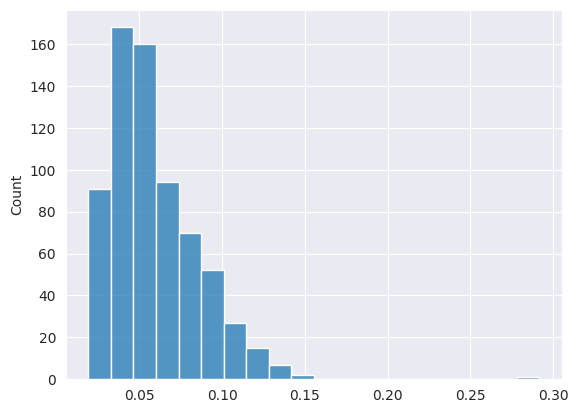

In [262]:
sns.histplot(distances, bins=20)

In [263]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
).impute(method="neighborhood")

In [264]:
qm = qm.append(method="shuffle")

In [265]:
qm = QuantMatrix(
    quantification_file=qm.to_df()[qm.to_df()['Decoy'] == 1].copy(),
    design_matrix_file=design_matrix
)

In [266]:
X, y = qm.to_ml()

In [267]:
X = X.T.copy()
X

,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,20200520_TOF1_AF_551_ZeBanC_P6_A2,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
decoy_P00747,6.273480,6.427596,6.103558,6.366194,6.181602,6.296566,6.531822,6.777009,5.906396,6.481969,...,6.240843,6.253390,5.807477,6.089502,6.413893,6.518884,7.021915,6.173718,6.399538,6.805669
decoy_P02787,8.319505,8.546444,8.198260,8.426472,7.743145,8.897310,8.634403,8.407297,8.679970,8.827313,...,7.937633,7.967486,8.627544,8.215087,7.383481,8.602188,8.047986,8.374033,8.365360,8.219281
decoy_P02675,9.014951,8.705130,8.093065,9.084702,9.120991,9.020555,8.734857,8.218952,8.022315,8.621844,...,8.307659,8.413183,8.701449,8.906230,8.691367,8.590912,8.615361,8.894681,8.658162,9.251328
decoy_P01024,8.314500,8.229213,7.992400,8.606705,8.448371,7.913333,8.273256,8.450396,7.020067,7.845919,...,8.150331,8.122742,8.203615,7.962823,8.140939,7.972393,8.120661,8.184827,7.950166,7.943383
decoy_P13671,5.369945,5.913648,5.277143,5.059509,4.877632,4.853641,4.916116,5.131477,5.492739,5.151819,...,5.178557,5.154690,5.028113,4.951645,4.338255,4.422744,5.086593,5.424439,4.756501,5.348601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decoy_P04264,3.911493,5.243598,4.107292,4.515708,4.587296,4.447833,5.080665,4.242730,4.274525,3.810681,...,4.074687,4.371009,4.130293,4.084309,4.347003,4.102633,3.836667,4.894959,3.955240,4.552712
decoy_O95497,3.863294,4.290136,3.170548,4.886121,4.430622,3.929924,4.528909,4.948594,4.307295,4.026522,...,4.348977,5.318108,5.627408,4.337663,4.502755,4.931143,5.553497,4.172389,5.266238,4.299378
decoy_P01767,7.660821,7.509561,7.190174,7.403191,7.103121,7.157434,7.231980,7.077077,7.333208,7.259419,...,7.630740,7.015890,7.952932,7.519206,6.805357,7.153558,7.008861,7.044984,7.844657,7.448637
decoy_P30041,2.932560,3.972408,4.094530,3.954122,3.572791,4.165318,3.563297,4.204203,2.570388,2.872199,...,2.706348,4.879226,3.836393,3.496824,4.613102,3.936686,3.030895,3.844626,3.197234,4.189616


In [268]:
from scipy.cluster import hierarchy

In [269]:
from scipy.stats import spearmanr

corr = spearmanr(X).correlation
corr = np.nan_to_num(corr, nan=0)

In [270]:
corr

array([[1.        , 0.80268579, 0.77465117, ..., 0.75660605, 0.82160188,
        0.8140973 ],
       [0.80268579, 1.        , 0.76149238, ..., 0.78280631, 0.81909561,
        0.78793793],
       [0.77465117, 0.76149238, 1.        , ..., 0.80325104, 0.78935992,
        0.76139995],
       ...,
       [0.75660605, 0.78280631, 0.80325104, ..., 1.        , 0.7700599 ,
        0.80387849],
       [0.82160188, 0.81909561, 0.78935992, ..., 0.7700599 , 1.        ,
        0.77258216],
       [0.8140973 , 0.78793793, 0.76139995, ..., 0.80387849, 0.77258216,
        1.        ]])

In [271]:
distance_matrix = 1 - np.abs(corr)
distance_matrix

array([[0.        , 0.19731421, 0.22534883, ..., 0.24339395, 0.17839812,
        0.1859027 ],
       [0.19731421, 0.        , 0.23850762, ..., 0.21719369, 0.18090439,
        0.21206207],
       [0.22534883, 0.23850762, 0.        , ..., 0.19674896, 0.21064008,
        0.23860005],
       ...,
       [0.24339395, 0.21719369, 0.19674896, ..., 0.        , 0.2299401 ,
        0.19612151],
       [0.17839812, 0.18090439, 0.21064008, ..., 0.2299401 , 0.        ,
        0.22741784],
       [0.1859027 , 0.21206207, 0.23860005, ..., 0.19612151, 0.22741784,
        0.        ]])

In [272]:
decoy_distances = []

for i in range(distance_matrix.shape[0]):
    
    first = distance_matrix[i, :i]
    second = distance_matrix[i, i+1:]
    
    combined = np.concatenate((first, second))
    
    decoy_distances.append(np.min(combined))
        

<Axes: ylabel='Count'>

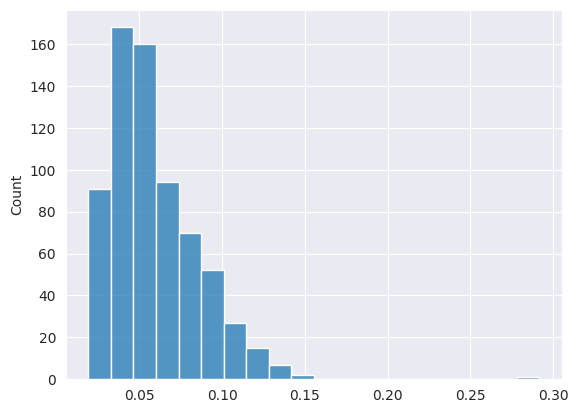

In [273]:
sns.histplot(distances, bins=20)

In [274]:
distance_df = pd.DataFrame(
    {
        'label': ["Decoy" for _ in range(len(decoy_distances))] + ["Target" for _ in range(len(distances))],
        'distance': decoy_distances + distances
    }
)

In [275]:
distance_df['distance_score'] = 1 - distance_df['distance']

<Axes: xlabel='distance_score', ylabel='Count'>

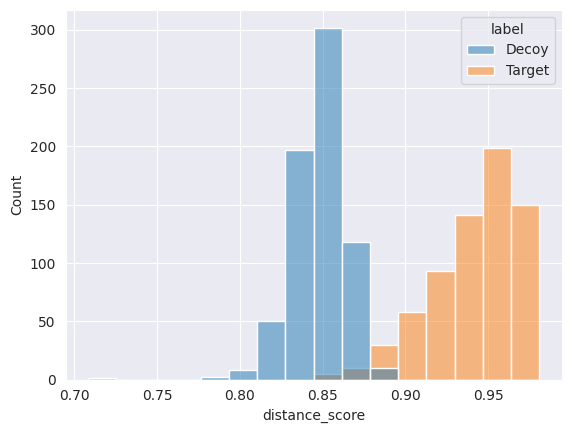

In [276]:
sns.histplot(distance_df, x="distance_score", hue="label")

In [277]:
distance_df['label_'] = np.where(
    distance_df['label'] == "Decoy", 0, 1   
)

In [278]:
from dpks.fdr import DecoyCounter

decoy_counts = DecoyCounter()

distance_df['q_value'] = decoy_counts.q_values(distance_df['distance_score'], distance_df['label_'])

In [279]:
distance_cutoff = distance_df[distance_df['q_value'] < 0.05].sort_values("q_value", ascending=False).head(1)['distance'].values[0]

In [280]:
distance_cutoff

0.12785865372651484

In [281]:
qm = QuantMatrix(
    quantification_file="/home/aaron/projects/dpks/notebooks/ml_api/quantified_proteins.tsv", #../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
).impute(method="neighborhood")

In [282]:
qm = qm.compare(
    method="linregress",
    min_samples_per_group=10,
    comparisons=[(2, 1)]
)

In [283]:
X, y = qm.to_ml()

In [284]:
X = X.T.copy()
X

,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,20200520_TOF1_AF_551_ZeBanC_P6_A2,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
P00747,6.369558,6.273480,6.986697,6.515837,5.695563,6.356513,7.004830,6.356030,5.910256,6.413893,...,6.468140,6.453261,6.571446,6.681331,6.671234,6.622158,6.412603,6.805669,6.783759,6.550999
P02787,8.401196,8.880733,8.507033,8.520859,7.735718,8.295316,7.937633,8.426938,8.223306,8.711774,...,8.530269,8.230319,8.321719,8.615886,8.624988,8.288215,8.365201,8.738553,8.568250,8.988438
P02675,9.841766,8.345927,8.950592,9.161668,9.527870,8.154696,8.627954,8.936483,8.133183,8.361185,...,8.038910,9.749433,8.914521,8.701449,8.196697,8.782215,8.099411,8.209688,8.478864,7.690843
P01024,6.893714,7.805909,8.229213,8.362354,7.758402,8.140939,8.292043,8.141514,6.856413,8.274714,...,8.218407,7.375825,7.833996,8.032924,7.923644,8.120836,8.518470,7.929849,8.055062,7.735543
P13671,4.900842,5.044468,5.596706,5.146233,4.364944,4.937289,5.675970,5.132487,5.044829,5.514098,...,4.958072,4.358831,4.729202,5.025295,5.066806,5.272335,5.423808,4.548170,5.426075,5.013546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P04264,4.232790,4.126837,4.168744,4.722627,4.523232,3.800740,4.288471,5.035924,4.250639,4.442108,...,4.084592,4.768327,4.968356,4.057926,4.568732,4.085610,4.398894,4.755942,4.501923,4.180240
O95497,4.834757,4.369973,4.548755,4.959731,4.721399,3.929297,5.110733,4.505318,4.475277,4.629035,...,3.952255,3.931325,3.865047,3.924913,4.139811,4.556495,4.575853,4.149811,4.244380,4.471597
P01767,8.050850,8.525077,8.029250,7.477583,7.403496,6.978130,7.451494,8.560614,7.223931,7.666115,...,8.260549,8.294685,7.448637,8.084459,7.423096,8.315475,7.601514,8.301903,7.232927,7.005174
P30041,3.550932,4.180662,3.245643,4.371219,4.287897,3.236564,3.485505,4.174297,3.426468,4.148916,...,3.917576,3.579856,2.756870,2.916565,3.642525,3.718764,3.645203,3.640422,2.974780,3.532104


In [285]:
from scipy.cluster import hierarchy


In [286]:
from scipy.stats import spearmanr

corr = spearmanr(X).correlation
corr = np.nan_to_num(corr, nan=0)

In [287]:
corr

array([[1.        , 0.82105441, 0.79380366, ..., 0.73937859, 0.73741624,
        0.72094065],
       [0.82105441, 1.        , 0.81433015, ..., 0.7507901 , 0.77883894,
        0.79859756],
       [0.79380366, 0.81433015, 1.        , ..., 0.78098971, 0.79516166,
        0.75626122],
       ...,
       [0.73937859, 0.7507901 , 0.78098971, ..., 1.        , 0.87214846,
        0.77121349],
       [0.73741624, 0.77883894, 0.79516166, ..., 0.87214846, 1.        ,
        0.76462077],
       [0.72094065, 0.79859756, 0.75626122, ..., 0.77121349, 0.76462077,
        1.        ]])

In [288]:
distance_matrix = 1 - np.abs(corr)

In [289]:
from scipy.spatial.distance import squareform

dist_linkage = hierarchy.linkage(
    squareform(distance_matrix), 
    method="ward"
)

In [290]:
#Z = hierarchy.linkage(X, 'ward')

In [291]:
#Z

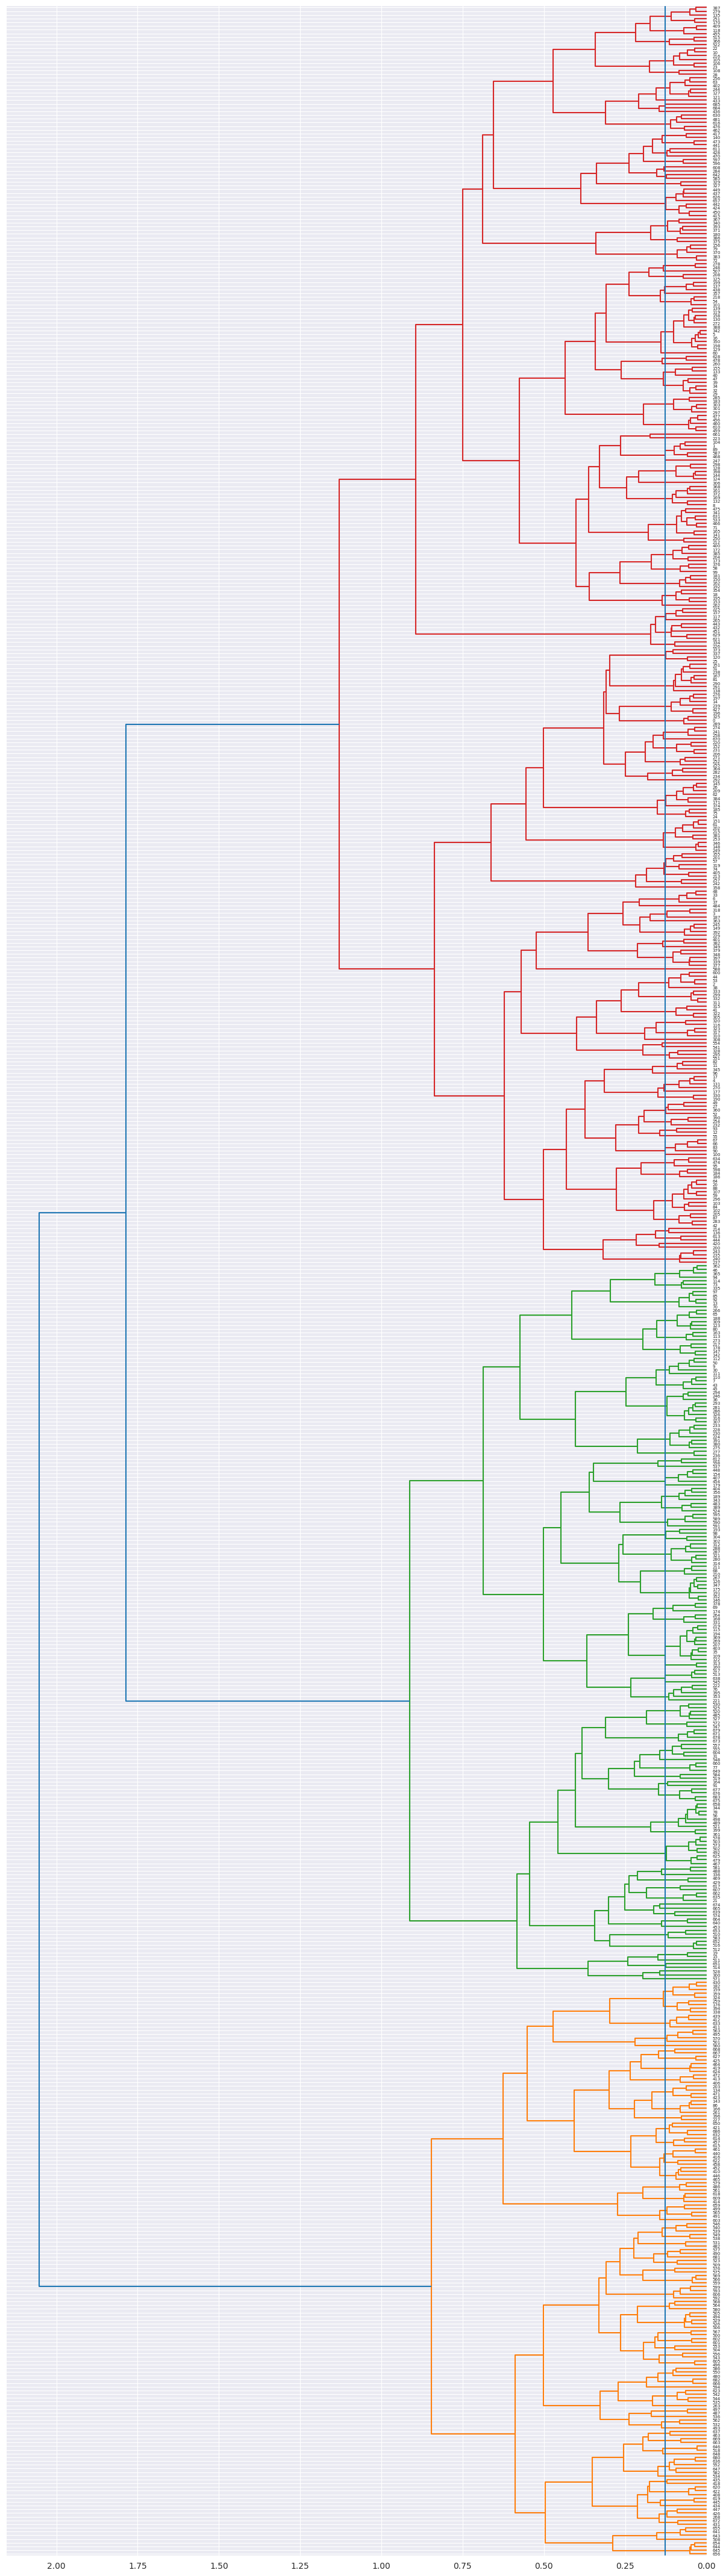

In [292]:
import matplotlib.pyplot as plt

plt.figure()

dn = hierarchy.dendrogram(dist_linkage, orientation="left")

plt.gca().axvline(x=distance_cutoff)

plt.gcf().set_size_inches(15, 55)

In [305]:
X

,20200520_TOF1_AF_002_ZeBanC_P1_A1,20200520_TOF1_AF_545_ZeBanC_P4_H9,20200520_TOF1_AF_567_ZeBanC_P6_B9,20200710_TOF1_LS_239_ZeBanc2_P1_C12,20200710_TOF1_LS_240_ZeBanc2_P3_H1,20200710_TOF1_LS_242_ZeBanc2_P3_D3,20200520_TOF1_AF_561_ZeBanC_P6_A9,20200520_TOF1_AF_560_ZeBanC_P6_A8,20200710_TOF1_LS_243_ZeBanc2_P2_B10,20200520_TOF1_AF_551_ZeBanC_P6_A2,...,20200520_TOF1_AF_480_ZeBanC_P4_D4,20200520_TOF1_AF_479_ZeBanC_P4_D3,20200520_TOF1_AF_477_ZeBanC_P4_D2,20200520_TOF1_AF_473_ZeBanC_P4_C10,20200520_TOF1_AF_470_ZeBanC_P4_C8,20200520_TOF1_AF_468_ZeBanC_P4_C6,20200520_TOF1_AF_460_ZeBanC_P4_B12,20200520_TOF1_AF_454_ZeBanC_P4_B7,20200520_TOF1_AF_452_ZeBanC_P4_B6,20200710_TOF1_LS_478_ZeBanc2_P3_C2
P00747,6.369558,6.273480,6.986697,6.515837,5.695563,6.356513,7.004830,6.356030,5.910256,6.413893,...,6.468140,6.453261,6.571446,6.681331,6.671234,6.622158,6.412603,6.805669,6.783759,6.550999
P02787,8.401196,8.880733,8.507033,8.520859,7.735718,8.295316,7.937633,8.426938,8.223306,8.711774,...,8.530269,8.230319,8.321719,8.615886,8.624988,8.288215,8.365201,8.738553,8.568250,8.988438
P02675,9.841766,8.345927,8.950592,9.161668,9.527870,8.154696,8.627954,8.936483,8.133183,8.361185,...,8.038910,9.749433,8.914521,8.701449,8.196697,8.782215,8.099411,8.209688,8.478864,7.690843
P01024,6.893714,7.805909,8.229213,8.362354,7.758402,8.140939,8.292043,8.141514,6.856413,8.274714,...,8.218407,7.375825,7.833996,8.032924,7.923644,8.120836,8.518470,7.929849,8.055062,7.735543
P13671,4.900842,5.044468,5.596706,5.146233,4.364944,4.937289,5.675970,5.132487,5.044829,5.514098,...,4.958072,4.358831,4.729202,5.025295,5.066806,5.272335,5.423808,4.548170,5.426075,5.013546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P04264,4.232790,4.126837,4.168744,4.722627,4.523232,3.800740,4.288471,5.035924,4.250639,4.442108,...,4.084592,4.768327,4.968356,4.057926,4.568732,4.085610,4.398894,4.755942,4.501923,4.180240
O95497,4.834757,4.369973,4.548755,4.959731,4.721399,3.929297,5.110733,4.505318,4.475277,4.629035,...,3.952255,3.931325,3.865047,3.924913,4.139811,4.556495,4.575853,4.149811,4.244380,4.471597
P01767,8.050850,8.525077,8.029250,7.477583,7.403496,6.978130,7.451494,8.560614,7.223931,7.666115,...,8.260549,8.294685,7.448637,8.084459,7.423096,8.315475,7.601514,8.301903,7.232927,7.005174
P30041,3.550932,4.180662,3.245643,4.371219,4.287897,3.236564,3.485505,4.174297,3.426468,4.148916,...,3.917576,3.579856,2.756870,2.916565,3.642525,3.718764,3.645203,3.640422,2.974780,3.532104


In [368]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

scores = []
distance_cutoffs = []


clusterer = AgglomerativeClustering(
        n_clusters=None,
        linkage="ward",
        distance_threshold=i
    )
    
cluster_ids = clusterer.fit_predict(X.T)

for i in np.arange(clusterer.distances_.min(axis=0) + 0.00001, clusterer.distances_.max(axis=0), 1):
    
    clusterer = AgglomerativeClustering(
        n_clusters=None,
        linkage="ward",
        distance_threshold=i
    )
    
    cluster_ids = clusterer.fit_predict(X.T)
    
    scores.append(silhouette_score(X.T, cluster_ids))
    distance_cutoffs.append(i)
    
    

In [369]:
test = pd.DataFrame(
    {
        "distance_threshold": distance_cutoffs,
        "scores": scores
    }
)

<Axes: xlabel='distance_threshold', ylabel='scores'>

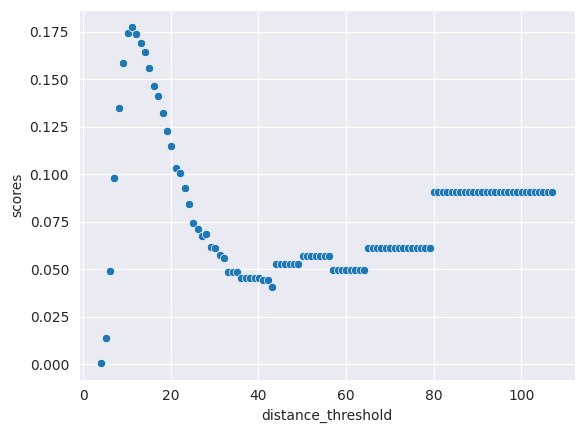

In [371]:
sns.scatterplot(
    data=test,
    x="distance_threshold",
    y="scores",
)

In [376]:
test.iloc[test['scores'].argmax(), :]['distance_threshold']

11.099598168691129

In [377]:
clusterer = AgglomerativeClustering(
        n_clusters=None,
        linkage="ward",
        distance_threshold=test.iloc[test['scores'].argmax(), :]['distance_threshold']
    )
    
cluster_ids = clusterer.fit_predict(X.T)

In [379]:
np.unique(cluster_ids)

(205,)